# **Weather parameters forecasting using Machine Learning models, Humidity**

# **1. Getting the Dataset**

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
weather_data= pd.read_csv("weather17_18.csv")
weather_data.head(15)

,Sr_no,Time,Date,Location,Wind Speed,Wind Direction,Air Temperature,Canopy Temperature,Rainfall,Leaf Wetness,Humidity
0,1,0:00:15,Apr 01 2017,Manjari,0.35,339.07,29.41,31.33,0.0,0.0,53.49
1,2,0:30:11,Apr 01 2017,Manjari,0.19,338.73,29.15,31.37,0.0,0.0,54.16
2,3,1:00:15,Apr 01 2017,Manjari,1.33,360.00,28.95,31.25,0.0,0.0,55.28
3,4,1:30:12,Apr 01 2017,Manjari,0.54,332.94,28.55,30.82,0.0,0.0,56.58
4,5,2:00:15,Apr 01 2017,Manjari,0.99,0.00,28.16,30.46,0.0,0.0,57.36
5,6,2:30:11,Apr 01 2017,Manjari,0.96,0.00,27.94,30.29,0.0,0.0,56.51
6,7,3:00:14,Apr 01 2017,Manjari,0.56,0.00,27.81,30.29,0.0,0.0,56.65
7,8,3:30:11,Apr 01 2017,Manjari,0.15,0.00,27.75,30.28,0.0,0.0,56.17
8,9,4:00:15,Apr 01 2017,Manjari,0.18,0.00,27.84,30.28,0.0,0.0,52.72
9,10,4:30:14,Apr 01 2017,Manjari,0.32,0.00,27.65,29.80,0.0,0.0,52.33


# **2. Plotting the Graphs**

<AxesSubplot:ylabel='Frequency'>

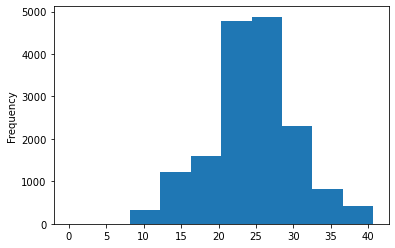

In [112]:
weather_data["Air Temperature"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

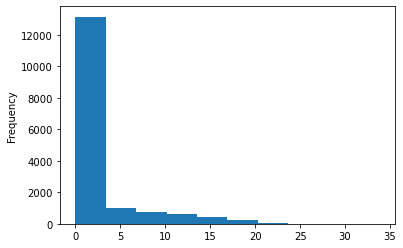

In [113]:
weather_data["Wind Speed"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

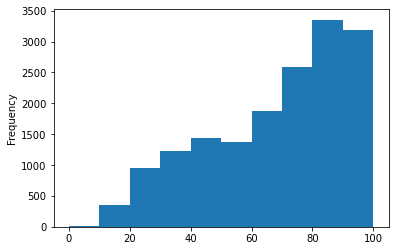

In [114]:
weather_data["Humidity"].plot.hist()

# **3. Finding the Null values**

In [115]:
weather_data.isnull()

,Sr_no,Time,Date,Location,Wind Speed,Wind Direction,Air Temperature,Canopy Temperature,Rainfall,Leaf Wetness,Humidity
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16346,False,False,False,False,False,False,False,False,False,False,False
16347,False,False,False,False,False,False,False,False,False,False,False
16348,False,False,False,False,False,False,False,False,False,False,False
16349,False,False,False,False,False,False,False,False,False,False,False


In [116]:
weather_data.isnull().sum()

Sr_no                 0
Time                  0
Date                  0
Location              0
Wind Speed            0
Wind Direction        0
Air Temperature       0
Canopy Temperature    0
Rainfall              0
Leaf Wetness          0
Humidity              0
dtype: int64

# **4. Plot the Heatmap**

<AxesSubplot:>

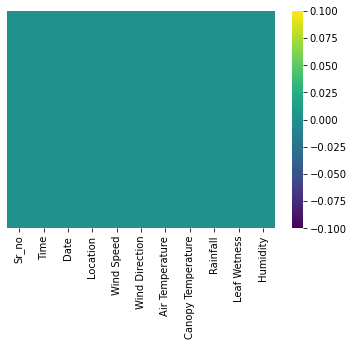

In [117]:
sns.heatmap(weather_data.isnull(), yticklabels=False, cmap="viridis")

# **5. Droping the values**

In [118]:
weather_data.drop("Date", axis=1, inplace=True)
weather_data.drop("Location", axis=1, inplace=True)
weather_data.head()

,Sr_no,Time,Wind Speed,Wind Direction,Air Temperature,Canopy Temperature,Rainfall,Leaf Wetness,Humidity
0,1,0:00:15,0.35,339.07,29.41,31.33,0.0,0.0,53.49
1,2,0:30:11,0.19,338.73,29.15,31.37,0.0,0.0,54.16
2,3,1:00:15,1.33,360.00,28.95,31.25,0.0,0.0,55.28
3,4,1:30:12,0.54,332.94,28.55,30.82,0.0,0.0,56.58
4,5,2:00:15,0.99,0.00,28.16,30.46,0.0,0.0,57.36


In [119]:
weather_data.drop("Sr_no", axis=1, inplace=True)

In [120]:
weather_data.drop("Time", axis=1, inplace=True)

In [121]:
weather_data.drop("Rainfall", axis=1, inplace=True)
weather_data.drop("Leaf Wetness", axis=1, inplace=True)

In [122]:
X=weather_data.drop("Humidity",axis=1)
y=weather_data["Humidity"].values
y

array([53.49, 54.16, 55.28, ..., 39.92, 38.18, 35.64])

In [123]:
x = X.iloc[:,:]
type(x)

pandas.core.frame.DataFrame

In [124]:
y 

array([53.49, 54.16, 55.28, ..., 39.92, 38.18, 35.64])

# **7. Train and Test**

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,random_state=15)

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## // Decision tree and adaboost regressor

In [127]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1d = regr_1.predict(X_train)
y_2d = regr_1.predict(X_test)

y_1ad = regr_2.predict(X_train)
y_2ad = regr_2.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error as mse

print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_1d), mse(y_test, y_2d)))

from math import sqrt
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, y_1d)), sqrt( mse(y_test, y_2d)) ))

from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, y_1d), mae(y_test, y_2d)))

import sklearn.metrics as metrics
r1_sk = metrics.r2_score(y_train,y_1d)
r2_sk = metrics.r2_score(y_test,y_2d)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 185.58273296033684
Mean Squared error on test data --> 186.6709979733937
root Mean Squared error on training data --> 13.622875355824732
 root Mean Squared error on test data --> 13.662759529955641
Mean absolute error on training data --> 10.431104359790766
Mean absolute error on test data --> 10.55717716158235
R-Squared: 0.6488227495301508


In [129]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = regr_1.predict(nexthour)
print(nexthour_humidity)

[78.64028244]


In [130]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_1ad), mse(y_test, y_2ad)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, y_1ad)), sqrt( mse(y_test, y_2ad)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, y_1ad), mae(y_test, y_2ad)))

r1_sk = metrics.r2_score(y_train,y_1ad)
r2_sk = metrics.r2_score(y_test,y_2ad)
print("R-Squared:", r1_sk)

Mean Squared error on training data --> 199.1651998202799
Mean Squared error on test data --> 205.19843878964144
root Mean Squared error on training data --> 14.112590117348406
 root Mean Squared error on test data --> 14.324749170217308
Mean absolute error on training data --> 12.31376188515487
Mean absolute error on test data --> 12.536628379858803
R-Squared: 0.6231207173939386


In [131]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = regr_2.predict(nexthour)
print(nexthour_humidity)

[78.71509563]


## using linear regression

In [132]:
from sklearn.linear_model import LinearRegression as lr
lrr = lr().fit(X_train,y_train)

In [133]:
predlrtest = lrr.predict(X_test)
predlrtrain = lrr.predict(X_train)

In [134]:

print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, predlrtrain), mse(y_test, predlrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, predlrtrain)), sqrt( mse(y_test, predlrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, predlrtrain), mae(y_test, predlrtest)))

r1_sk = metrics.r2_score(y_train, predlrtrain)
r2_sk = metrics.r2_score(y_test, predlrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 287.8943851716708
Mean Squared error on test data --> 282.8376086248007
root Mean Squared error on training data --> 16.967450756423926
 root Mean Squared error on test data --> 16.817776566026815
Mean absolute error on training data --> 14.866764450764139
Mean absolute error on test data --> 14.723162786383673
R-Squared: 0.45521893660277746


In [135]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = lrr.predict(nexthour)
print(nexthour_humidity)

[97.37288893]


## Ridge regression

In [136]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf = clf.fit(X_train, y_train)
Ridge()

Ridge()

In [137]:
clftrain = clf.predict(X_train)
clftest = clf.predict(X_test)

In [138]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, clftrain), mse(y_test, clftest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, clftrain)), sqrt( mse(y_test, clftest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, clftrain), mae(y_test, clftest)))

r1_sk = metrics.r2_score(y_train, clftrain)
r2_sk = metrics.r2_score(y_test, clftest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 287.90195196799317
Mean Squared error on test data --> 282.87050244854737
root Mean Squared error on training data --> 16.967673734722542
 root Mean Squared error on test data --> 16.81875448564927
Mean absolute error on training data --> 14.864178506304963
Mean absolute error on test data --> 14.721415532641368
R-Squared: 0.45520461799303946


In [139]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = clf.predict(nexthour)
print(nexthour_humidity)

[97.26768232]


## MLP regressor

In [140]:
from sklearn.neural_network import MLPRegressor as mlp
mlp = mlp(random_state=1, max_iter=1000).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [141]:
mlptrain = mlp.predict(X_train)
mlptest = mlp.predict(X_test)

In [142]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, clftrain), mse(y_test, clftest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, clftrain)), sqrt( mse(y_test, clftest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, clftrain), mae(y_test, clftest)))

r1_sk = metrics.r2_score(y_train, mlptrain)
r2_sk = metrics.r2_score(y_test, mlptest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 287.90195196799317
Mean Squared error on test data --> 282.87050244854737
root Mean Squared error on training data --> 16.967673734722542
 root Mean Squared error on test data --> 16.81875448564927
Mean absolute error on training data --> 14.864178506304963
Mean absolute error on test data --> 14.721415532641368
R-Squared: 0.6991853449882941


In [143]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = mlp.predict(nexthour)
print(nexthour_humidity)

[87.41681647]


## lasso regression

In [144]:
from sklearn import linear_model as lm
lms = lm.Lasso(alpha=0.1).fit(X_train, y_train)

In [145]:
lmstrain = lms.predict(X_train)
lmstest = lms.predict(X_test)

In [146]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, lmstrain), mse(y_test, lmstest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, lmstrain)), sqrt( mse(y_test, lmstest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, lmstrain), mae(y_test, lmstest)))

r1_sk = metrics.r2_score(y_train, lmstrain)
r2_sk = metrics.r2_score(y_test, lmstest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 290.0264937922834
Mean Squared error on test data --> 286.21196669912854
root Mean Squared error on training data --> 17.03016423268676
 root Mean Squared error on test data --> 16.91780029138329
Mean absolute error on training data --> 14.96727044472507
Mean absolute error on test data --> 14.837557546457754
R-Squared: 0.45118435843299787


In [147]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = lms.predict(nexthour)
print(nexthour_humidity)

[95.42188728]


## random forest regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor as rfr
regr = RandomForestRegressor(max_depth=2, random_state=0)
regrn = regr.fit(X_train, y_train)

In [149]:
rfrtrain = regrn.predict(X_train)
rfrtest = regrn.predict(X_test)

In [150]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, rfrtrain), mse(y_test, rfrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, rfrtrain)), sqrt( mse(y_test, rfrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, rfrtrain), mae(y_test, rfrtest)))

r1_sk = metrics.r2_score(y_train, rfrtrain)
r2_sk = metrics.r2_score(y_test, rfrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 226.04721775364456
Mean Squared error on test data --> 231.22803542496564
root Mean Squared error on training data --> 15.034866735480051
 root Mean Squared error on test data --> 15.206184117817514
Mean absolute error on training data --> 12.456777230360975
Mean absolute error on test data --> 12.698933074677205
R-Squared: 0.5722520132083084


In [151]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = regrn.predict(nexthour)
print(nexthour_humidity)

[81.436699]


## KNeighborsRegressor

In [152]:
from sklearn.neighbors import KNeighborsRegressor as knr
neigh = knr(n_neighbors=2)
knrn = neigh.fit(X_train, y_train)

In [153]:
knrtrain = knrn.predict(X_train)
knrtest = knrn.predict(X_test)

In [154]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, knrtrain), mse(y_test, knrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, knrtrain)), sqrt( mse(y_test, knrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, knrtrain), mae(y_test, knrtest)))

r1_sk = metrics.r2_score(y_train, knrtrain)
r2_sk = metrics.r2_score(y_test, knrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 48.493054435949716
Mean Squared error on test data --> 172.77625707518334
root Mean Squared error on training data --> 6.96369545830012
 root Mean Squared error on test data --> 13.144438256357072
Mean absolute error on training data --> 4.452217125382263
Mean absolute error on test data --> 8.898346577017115
R-Squared: 0.9082368426628292


In [155]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = knrn.predict(nexthour)
print(nexthour_humidity)

[85.3]


## SVM linera SVR

In [156]:
from sklearn.svm import LinearSVR as svm
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import StandardScaler
regr = mp(StandardScaler(), svm(random_state=0, tol=1e-5))
svmn = regr.fit(X_train, y_train)

In [157]:
svmtrain = svmn.predict(X_train)
svmtest = svmn.predict(X_test)

In [158]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, svmtrain), mse(y_test, svmtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, svmtrain)), sqrt( mse(y_test, svmtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, svmtrain), mae(y_test, svmtest)))

r1_sk = metrics.r2_score(y_train, svmtrain)
r2_sk = metrics.r2_score(y_test, svmtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 297.87642904674846
Mean Squared error on test data --> 296.7644598521497
root Mean Squared error on training data --> 17.259096993955055
 root Mean Squared error on test data --> 17.226852871379315
Mean absolute error on training data --> 14.700419431651559
Mean absolute error on test data --> 14.708508914134512
R-Squared: 0.4363299663510657


In [159]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = svmn.predict(nexthour)
print(nexthour_humidity)

[95.94487455]


## AdaBoostregressor 

In [160]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regrn = regr.fit(X_train, y_train)

In [161]:
regrtrain = regrn.predict(X_train)
regrtest = regrn.predict(X_test)

In [162]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, regrtrain), mse(y_test, regrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, regrtrain)), sqrt( mse(y_test, regrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, regrtrain), mae(y_test, regrtest)))

r1_sk = metrics.r2_score(y_train, regrtrain)
r2_sk = metrics.r2_score(y_test, regrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 200.65383643308544
Mean Squared error on test data --> 204.18200472870274
root Mean Squared error on training data --> 14.165233370230277
 root Mean Squared error on test data --> 14.289226876521443
Mean absolute error on training data --> 12.013937531786503
Mean absolute error on test data --> 12.16308112884326
R-Squared: 0.620303777992871


In [163]:
nexthour = X_test[5].reshape(1,-1)
nexthour_humidity = regrn.predict(nexthour)
print(nexthour_humidity)

[75.60063923]
